In [1]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

import os
import tqdm
from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import pathlib
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [4]:
import pathlib

train_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'training',
                                                      seed = 42, image_size = (256,256),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'validation',
                                                      seed = 42, image_size = (256,256),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [6]:
import re
class_names = train_ds.class_names
print(class_names)
dog_names = [word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [7]:
[word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

['n0208562',
 'Chihuahua',
 'n0208578',
 'Japanese_spaniel',
 'n0208593',
 'Maltese_dog',
 'n0208607',
 'Pekinese',
 'n0208624',
 'Shih-Tzu',
 'n0208664',
 'Blenheim_spaniel',
 'n0208691',
 'papillon',
 'n0208704',
 'toy_terrier',
 'n0208739',
 'Rhodesian_ridgeback',
 'n0208809',
 'Afghan_hound',
 'n0208823',
 'basset',
 'n0208836',
 'beagle',
 'n0208846',
 'bloodhound',
 'n0208863',
 'bluetick',
 'n0208907',
 'black-and-tan_coonhound',
 'n0208986',
 'Walker_hound',
 'n0208997',
 'English_foxhound',
 'n0209037',
 'redbone',
 'n0209062',
 'borzoi',
 'n0209072',
 'Irish_wolfhound',
 'n0209103',
 'Italian_greyhound',
 'n0209113',
 'whippet',
 'n0209124',
 'Ibizan_hound',
 'n0209146',
 'Norwegian_elkhound',
 'n0209163',
 'otterhound',
 'n0209183',
 'Saluki',
 'n0209200',
 'Scottish_deerhound',
 'n0209233',
 'Weimaraner',
 'n0209325',
 'Staffordshire_bullterrier',
 'n0209342',
 'American_Staffordshire_terrier',
 'n0209364',
 'Bedlington_terrier',
 'n0209375',
 'Border_terrier',
 'n0209385',

In [8]:
dog_names

['n0208562',
 'Chihuahua',
 'n0208578',
 'Japanese_spaniel',
 'n0208593',
 'Maltese_dog',
 'n0208607',
 'Pekinese',
 'n0208624',
 'Shih-Tzu',
 'n0208664',
 'Blenheim_spaniel',
 'n0208691',
 'papillon',
 'n0208704',
 'toy_terrier',
 'n0208739',
 'Rhodesian_ridgeback',
 'n0208809',
 'Afghan_hound',
 'n0208823',
 'basset',
 'n0208836',
 'beagle',
 'n0208846',
 'bloodhound',
 'n0208863',
 'bluetick',
 'n0208907',
 'black-and-tan_coonhound',
 'n0208986',
 'Walker_hound',
 'n0208997',
 'English_foxhound',
 'n0209037',
 'redbone',
 'n0209062',
 'borzoi',
 'n0209072',
 'Irish_wolfhound',
 'n0209103',
 'Italian_greyhound',
 'n0209113',
 'whippet',
 'n0209124',
 'Ibizan_hound',
 'n0209146',
 'Norwegian_elkhound',
 'n0209163',
 'otterhound',
 'n0209183',
 'Saluki',
 'n0209200',
 'Scottish_deerhound',
 'n0209233',
 'Weimaraner',
 'n0209325',
 'Staffordshire_bullterrier',
 'n0209342',
 'American_Staffordshire_terrier',
 'n0209364',
 'Bedlington_terrier',
 'n0209375',
 'Border_terrier',
 'n0209385',

In [9]:
len(class_names)

120

In [10]:
len(dog_names)

240

In [11]:
print([i for i in range(len(dog_names)) if i % 2 == 1])

dog_names2 =[]
for i in range(len(dog_names)):
        if i % 2 == 1:
            dog_names2.append(dog_names[i])

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239]


In [12]:
dog_names2

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

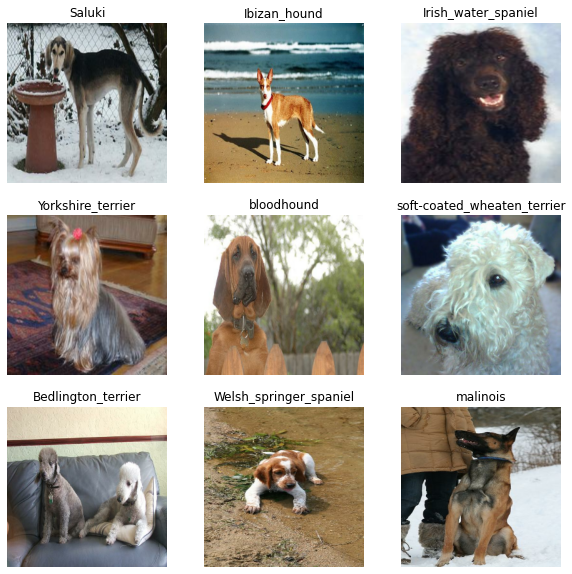

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_names2[labels[i]])
    plt.axis("off")

In [17]:
# Configure for dataset performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Standardize the data

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.012677242 1.0


In [ ]:
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_test_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [29]:
base_model = InceptionV3(weights='imagenet', 
                        include_top = False,
                        input_shape = (256,256,3),
                        classes = 120,
                        classifier_activation = "softmax")

In [31]:
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation = 'softmax', kernel_initializer=RandomNormal())
])
base_model.summary()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 127, 127, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 127, 127, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [32]:
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [33]:
model.compile(optimizer = SGD(learning_rate=.0005, momentum = .9),
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])
history = model.fit(normalized_ds, 
                   epochs = 30,
                   verbose = 1, 
                   validation_data= normalized_test_ds)

print(f"\nTraining Score: {model.evaluate(normalized_ds)}")
print(f"\nTest Score: {model.evaluate(normalized_test_ds)}")

Epoch 1/30
515/515 [==============================] - 501s 972ms/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 2/30
515/515 [==============================] - 562s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 3/30
515/515 [==============================] - 557s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 4/30
515/515 [==============================] - 575s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 5/30
515/515 [==============================] - 560s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 6/30
515/515 [==============================] - 546s 1s/step - loss: 0.0000e+00 - accuracy: 0.0086 - val_loss: 0.0000e+00 - val_accuracy: 0.0104
Epoch 7/30
515/515 [==============================] - 549s 1s/step - loss: 0.0000e+00 - acc

In [34]:
num_classes = len(dog_names2)

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    normalized_ds,
    epochs = 10, 
    validation_data = normalized_test_ds)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_376 (Conv2D)          (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_377 (Conv2D)          (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_378 (Conv2D)          (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)       

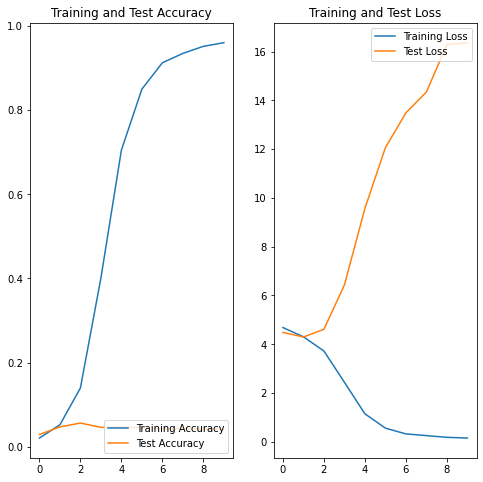

In [35]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [36]:

print(f"\nTraining Score: {model.evaluate(normalized_ds)}")
print(f"\nTest Score: {model.evaluate(normalized_test_ds)}")

515/515 [==============================] - 86s 166ms/step - loss: 2.0080 - accuracy: 0.6638

Training Score: [2.0079729557037354, 0.663811981678009]
129/129 [==============================] - 21s 164ms/step - loss: 16.3645 - accuracy: 0.0423

Test Score: [16.36454200744629, 0.042274054139852524]


In [37]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

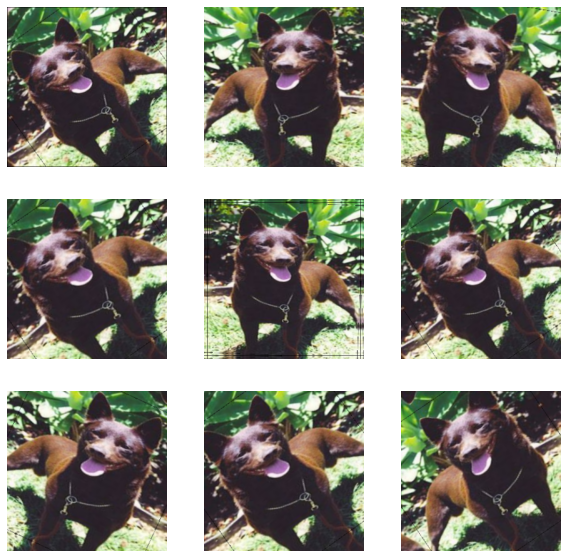

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in normalized_train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [39]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    normalized_ds,
    epochs = 30, 
    validation_data= normalized_test_ds)


print(f"\nTraining Score: {model.evaluate(normalized_ds)}")
print(f"\nTest Score: {model.evaluate(normalized_test_ds)}")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_379 (Conv2D)          (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_380 (Conv2D)          (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_381 (Conv2D)          (None, 64, 64, 64)       

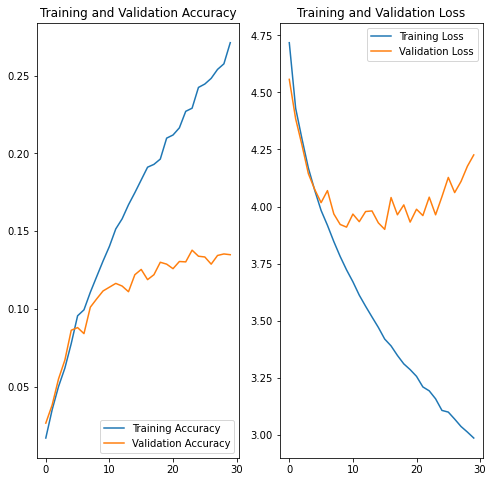

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()